# Introduction 

This project, hosted by Kaggle.com, entails the prediction of rainfall in Australia. The host provides us with years of weather data from various locations in Australia, including information such as temperature, pressure, and wind (link to Kaggle dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). There is no mention of what specific classification method(s) should be used. So, all the classification methods covered in this semester will be utilized to create the best model for predicting weather or not it will rain tomorrow.

## Warning

In [1]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get the sizes
plt.rc('font',  size=20)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## Data Preprocessing

This portion of the code covers the preprocessing procedures for the given data. 

In [3]:
import pandas as pd

# Load the dataset
df_raw = pd.read_csv('weatherAUS.csv',header=0)

# Make a copy of the dataset
df = df_raw.copy(deep=True)

In [4]:
df_raw.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
df = df.dropna()

In [6]:
# Print the dimensions of the Dataset

pd.DataFrame([[df.shape[0],df.shape[1]]],columns=['# of rows',"# of columns"])

,# of rows,# of columns
0,56420,24


In [7]:
# Print the first 5 rows of the Dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No


# Getting the Name of the Target

In [8]:
target = "RainTomorrow"

## Dividing the data into training, testing, and validation

In [9]:
from sklearn.model_selection import train_test_split

# Divide the data into training (80%) and testing (20%)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42, stratify=df[target])

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and validation (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42, stratify=df_train[target])

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)

In [10]:
# Print the dimensions of df_train

pd.DataFrame([[df_train.shape[0],df_train.shape[1]]],columns=['# of rows','# of columns'])

,# of rows,# of columns
0,36108,24


In [11]:
## Print the dimensions of df_test

pd.DataFrame([[df_test.shape[0],df_test.shape[1]]],columns=['# of rows','# of columns'])

,# of rows,# of columns
0,11284,24


In [12]:
# Print the dimensions of df_valid

pd.DataFrame([[df_valid.shape[0],df_valid.shape[1]]],columns=['# of rows','# of columns'])

,# of rows,# of columns
0,9028,24


## Handling the Identifiers

In [13]:
# Combining the df_train, df_test, and df_valid datasets

df = pd.concat([df_train,df_test,df_valid],sort=False)

### Identifying the identifiers

In [14]:
def id_checker(df):
    
    # Get the identifiers
    df_id = df[[var for var in df.columns
               if df[var].nunique(dropna=True)==df[var].notnull().sum()]]
    
    return df_id

In [15]:
# Call id_checker on df
df_id = id_checker(df)

# Print the first 5 rows of df
df_id.head()

""
0
1
2
3
4


## Removing the identifiers

In [16]:
import numpy as np

# Remove the identifiers from df_train
df_train = df_train.drop(columns=np.intersect1d(df_id.columns,df_train.columns))

# Remove the identifiers from df_test
df_test = df_test.drop(columns=np.intersect1d(df_id.columns,df_test.columns))

# Remove the identifiers from df_valid
df_valid = df_valid.drop(columns=np.intersect1d(df_id.columns,df_valid.columns))

In [17]:
# Print the first 5 rows of df_train

df_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2015-03-08,Sydney,19.6,27.6,0.0,5.8,6.7,SSE,35.0,WNW,...,62.0,1011.1,1009.5,7.0,7.0,21.0,25.6,No,0.0,No
1,2013-11-27,Sydney,13.7,23.9,0.0,5.6,12.6,E,30.0,WNW,...,48.0,1018.3,1014.8,1.0,1.0,19.5,22.5,No,0.0,No
2,2016-03-27,AliceSprings,17.4,35.6,0.0,10.2,11.4,S,41.0,ESE,...,21.0,1017.3,1012.1,1.0,1.0,25.4,33.8,No,0.0,No
3,2009-01-12,AliceSprings,17.4,38.1,0.0,15.0,13.1,SE,43.0,ESE,...,8.0,1009.3,1005.3,0.0,1.0,30.6,37.5,No,0.0,No
4,2009-11-24,Hobart,12.5,24.9,0.2,4.0,10.9,NW,72.0,NNW,...,40.0,1016.6,1015.5,7.0,4.0,16.5,24.4,No,0.0,No


In [18]:
# Print the first 5 rows of df_test
df_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2012-04-23,Perth,11.3,23.1,0.0,5.0,10.5,SSE,26.0,E,...,36.0,1024.0,1020.3,1.0,0.0,15.2,22.5,No,0.0,No
1,2013-04-13,Portland,13.5,19.0,0.2,4.6,2.1,WNW,57.0,NNW,...,89.0,1012.1,1009.9,8.0,6.0,17.2,19.0,No,7.2,Yes
2,2011-05-27,Cairns,13.2,25.4,0.0,6.0,11.0,SE,37.0,S,...,41.0,1017.7,1013.5,1.0,1.0,20.4,24.3,No,0.0,No
3,2017-06-15,Mildura,6.2,18.6,0.0,6.6,4.3,ESE,15.0,NE,...,50.0,1027.9,1025.4,8.0,7.0,8.9,17.4,No,0.0,No
4,2011-02-16,Moree,19.9,32.3,1.0,4.8,12.1,NE,43.0,ENE,...,43.0,1016.7,1013.0,5.0,5.0,23.5,30.8,No,0.0,No


In [19]:
# Print the first 5 rows of df_valid
df_valid.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2011-03-20,WaggaWagga,15.6,27.5,0.0,5.2,10.1,ENE,50.0,E,...,44.0,1011.7,1008.5,2.0,3.0,21.1,26.9,No,0.0,No
1,2015-02-16,Nuriootpa,15.5,28.5,0.0,12.0,8.2,SE,41.0,SSW,...,23.0,1018.2,1016.3,6.0,4.0,16.9,27.1,No,0.0,No
2,2013-04-14,SydneyAirport,16.0,28.6,0.0,5.4,10.6,NW,30.0,WNW,...,43.0,1013.8,1010.6,2.0,2.0,21.5,26.9,No,0.0,No
3,2017-02-27,Hobart,12.0,26.6,0.0,6.6,12.4,NNW,33.0,NNW,...,29.0,1026.3,1023.2,1.0,1.0,15.1,25.5,No,0.0,No
4,2015-05-09,Sydney,11.4,21.0,0.0,2.8,10.3,WNW,35.0,W,...,36.0,1017.1,1013.9,1.0,1.0,14.5,20.7,No,0.0,No


## Handling Date and Time

In [20]:
# Create a function that will retrieve information from the date column and store it in new columns
def var_to_datetime(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=df['Date'].dt.year
    df['Month']=df['Date'].dt.month
    df['Day']=df['Date'].dt.day    
    return df


In [21]:
# Apply var_to_datetime to df_train
df_train = var_to_datetime(df_train)

# Apply var_to_datetime to df_test
df_test = var_to_datetime(df_test)

# Apply var_to_datetime to df_valid
df_valid = var_to_datetime(df_valid)


## Encoding the data

### Combining the training, testing, and validation data 

In [22]:
# Combine df_train, df_test, and df_valid
df = pd.concat([df_train,df_test,df_valid],sort=False)

# Print the unique dtype of variables in df
pd.DataFrame(df.dtypes.unique(),columns=['dtype'])

,dtype
0,datetime64[ns]
1,object
2,float64
3,int64


### Identifying the Categorical Variables 

In [23]:
def cat_var_checker(df):
    # Get the dataframe of categorical variables and their number of unique values
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                          for var in df.columns if df[var].dtype=='object'],
                         columns=['var','nunique'])
    
    # Sort df_cat in ascending order of the number of unique values
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [24]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,Location,26
1,WindGustDir,16
2,WindDir9am,16
3,WindDir3pm,16
4,RainToday,2
5,RainTomorrow,2


In [25]:
# Remove unwanted columns (The RISK_MM column was removed as it was recommended by the project host)
df = df.drop(['Date','RISK_MM'], axis=1)

In [26]:
# Print the first 5 rows of df
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Sydney,19.6,27.6,0.0,5.8,6.7,SSE,35.0,WNW,SSE,...,1009.5,7.0,7.0,21.0,25.6,No,No,2015,3,8
1,Sydney,13.7,23.9,0.0,5.6,12.6,E,30.0,WNW,E,...,1014.8,1.0,1.0,19.5,22.5,No,No,2013,11,27
2,AliceSprings,17.4,35.6,0.0,10.2,11.4,S,41.0,ESE,S,...,1012.1,1.0,1.0,25.4,33.8,No,No,2016,3,27
3,AliceSprings,17.4,38.1,0.0,15.0,13.1,SE,43.0,ESE,SSE,...,1005.3,0.0,1.0,30.6,37.5,No,No,2009,1,12
4,Hobart,12.5,24.9,0.2,4.0,10.9,NW,72.0,NNW,NNW,...,1015.5,7.0,4.0,16.5,24.4,No,No,2009,11,24


## Encoding the categorical features

In [27]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'],[target]))

# Print the first 5 rows of df
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,19.6,27.6,0.0,5.8,6.7,35.0,11.0,22.0,87.0,62.0,...,0,0,0,0,1,0,0,0,0,0
1,13.7,23.9,0.0,5.6,12.6,30.0,13.0,20.0,52.0,48.0,...,0,0,0,0,0,0,0,0,0,0
2,17.4,35.6,0.0,10.2,11.4,41.0,19.0,11.0,34.0,21.0,...,0,0,1,0,0,0,0,0,0,0
3,17.4,38.1,0.0,15.0,13.1,43.0,24.0,17.0,9.0,8.0,...,0,0,0,1,0,0,0,0,0,0
4,12.5,24.9,0.2,4.0,10.9,72.0,31.0,24.0,53.0,40.0,...,0,1,0,0,0,0,0,0,0,0


## Encoding the categorical target

In [61]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode the categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,19.6,27.6,0.0,5.8,6.7,35.0,11.0,22.0,87.0,62.0,...,0,0,0,0,1,0,0,0,0,0
1,13.7,23.9,0.0,5.6,12.6,30.0,13.0,20.0,52.0,48.0,...,0,0,0,0,0,0,0,0,0,0
2,17.4,35.6,0.0,10.2,11.4,41.0,19.0,11.0,34.0,21.0,...,0,0,1,0,0,0,0,0,0,0
3,17.4,38.1,0.0,15.0,13.1,43.0,24.0,17.0,9.0,8.0,...,0,0,0,1,0,0,0,0,0,0
4,12.5,24.9,0.2,4.0,10.9,72.0,31.0,24.0,53.0,40.0,...,0,1,0,0,0,0,0,0,0,0


## Seperating the training, testing, and validation data

In [62]:
# Seperating the training data
df_train = df.iloc[0:df_train.shape[0],:].copy(deep=True)

# Seperating the testing data
df_test = df.iloc[df_train.shape[0]:df_train.shape[0]+df_test.shape[0],:].copy(deep=True)

# Seperating the validation data
df_valid = df.iloc[df_train.shape[0]+df_test.shape[0]:,:].copy(deep=True)

In [63]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0],df_train.shape[1]]],columns=['# of rows','# of columns'])

,# of rows,# of columns
0,36108,96


In [64]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0],df_test.shape[1]]],columns=['# of rows','# of columns'])

,# of rows,# of columns
0,11284,96


In [65]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0],df_valid.shape[1]]],columns=['# of rows','# of columns'])

,# of rows,# of columns
0,9028,96


## Getting the name of the features

In [66]:
features = np.setdiff1d(df.columns, [target])

## Getting the feature matrix and target vector

In [67]:
# Get the feature matrix
X_train = df_train[features].to_numpy()
X_test = df_test[features].to_numpy()
X_valid = df_valid[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_valid = df_valid[target].astype(int).to_numpy()
y_test = df_test[target]

## Scaling the data 

In [68]:
df_test[target].head()

0    0
1    1
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

In [69]:
from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the test data
X_test = mms.transform(X_test)

# Normalize the valid data
X_valid = mms.transform(X_valid)


# Preparing the dataset for machine learning algorithms

## Hyperparameter Tuning and Model Selection

### Creating the Dictionary of the Models

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=42),
         'abc': AdaBoostClassifier(random_state=48),
         'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
         'hgbc': HistGradientBoostingClassifier(random_state=42),
         'xgbc': XGBClassifier(seed=42),
         'mlpc': MLPClassifier(early_stopping=True, random_state=42)}

### Creating the Dictionary of the Pipelines

In [71]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

### Getting the Predefined Split Cross-Validator

In [72]:
from sklearn.model_selection import PredefinedSplit

# Combine the feature matrix in the training and validation data
X_train_valid = np.vstack((X_train, X_valid))

# Combine the target vector in the training and validation data
y_train_valid = np.append(y_train, y_valid)

# Get the indices of training and validationd ata
train_valid_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_valid.shape[0],0))

# The PredefinedSplit
ps = PredefinedSplit(train_valid_idxs)

### Creating the Dictionary of the Parameter Grids 

In [73]:
param_grids = {}

#### The parameter grid for decision tree

In [74]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for AdaBoost

In [75]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-4, 5)]

param_grids['abc'] = [{'model__learning_rate': learning_rate_grids}]

#### The parameter grid for random forest

In [76]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for histogram gradient boosting

In [77]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,20,100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for xgboost

In [78]:
# The grids for eta
eta_grids = [10 ** i for i in range(-4, 1)]

# The grids for gamma
gamma_grids = [0, 10, 100]

# The grids for lambda
lambda_grids = [10 ** i for i in range(-4, 5)]

# Update param_grids
param_grids['xgbc'] = [{'model__eta': eta_grids,
                       'model__gamma': gamma_grids,
                       'model__lambda': lambda_grids}]

#### The parameter grid for multi-layer perception classifier

In [79]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-6, -1)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-5, 0 )]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                      'model__learning_rate_init': learning_rate_init_grids}]


### Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_param_estimator_gs = []

for acronym in pipes.keys():
    #GridSearchCV
    gs = GridSearchCV(estimator = pipes[acronym],
                     param_grid=param_grids[acronym],
                     scoring='f1_micro',
                     n_jobs=2,
                     cv=ps,
                     return_train_score=True)
    # Fit the pipeline
    gs = gs.fit(X_train_valid, y_train_valid)
    
    # Update best_score_param_estimator_gs
    best_score_param_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Write cv_results file
    cv_results = pd.DataFrame.from_dict(gs.cv_results_)

### Model Selection

In [81]:
# Sort best_score_param_estimator_gs in descending order of the best_score
best_score_param_estimator_gs = sorted(best_score_param_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimator_gs
best_models = pd.DataFrame(best_score_param_estimator_gs, columns=['best_score','best_param','best_estimator'])
best_models

,best_score,best_param,best_estimator
0,0.864976,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
1,0.861099,"{'model__alpha': 0.0001, 'model__learning_rate...","(MLPClassifier(activation='relu', alpha=0.0001..."
2,0.860434,"{'model__eta': 0.0001, 'model__gamma': 10, 'mo...","(XGBClassifier(base_score=0.5, booster='gbtree..."
3,0.857554,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
4,0.853456,{'model__learning_rate': 1},"((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
5,0.799513,"{'model__min_samples_leaf': 1, 'model__min_sam...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."


In [82]:
best_model = best_models['best_estimator'][0]

## Evaluating the winning model

In [83]:
# Get the prediction of the testing data using best_model
y_test_pred = best_model.predict(X_test)

y_test = y_test.astype(int).to_numpy()


[]

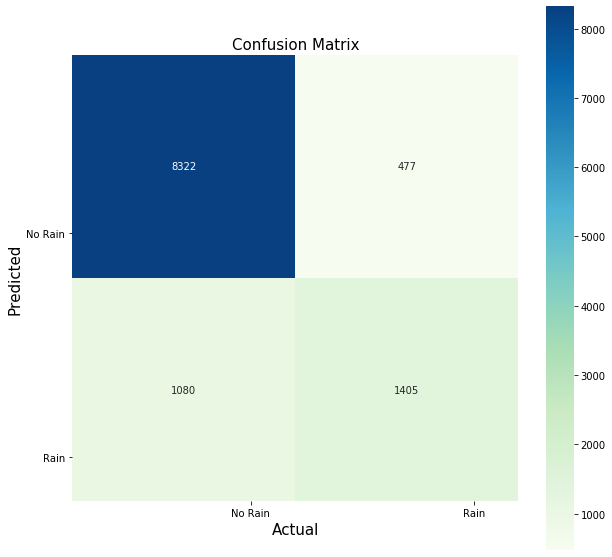

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(10,10))
ax = sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)
class_labels = ['No Rain', 'Rain']

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

ticks = np.arange(len(class_labels))+0.5

ax.set_xticks(ticks+0.3)
ax.set_xticklabels(class_labels, rotation=0)

ax.set_yticks(ticks+0.3)
ax.set_yticklabels(class_labels, rotation=0)

ax.set_title('Confusion Matrix')

plt.plot()



# Conclusion

The best model (based on the score) for predicting rainfall in Australia turns out to be the histogram gradient boosting model. The hyperparameters, learning_rate and min_sample_leaf_grids, have values of 0.1 and 100, respectively. After applying the model on the validation data, we get a recall value of 0.885345. For future reference, it would be ideal to test the models of each classifier with more hyperparameter values. Furthermore, it would be beneficial to tweak the model so that the number of false negatives were minimized and the recall value was increased even if it meant increasing the number of false positives, thereby decreasing the precision value of the model. 